> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid')


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv', encoding = 'latin 1' )

df.head()
#   types and look for instances of missing or possibly errant data.







,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

In [10]:
#drop columns not needed from analysis
df.drop(['PatientId','AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)

In [11]:
df.head()



,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


df['Hipertension'] = df['Hipertension'].astype(bool)
df['Scholarship'] = df['Scholarship'].astype(bool)
df['Diabetes'] = df['Diabetes'].astype(bool)
df['Alcoholism'] = df['Alcoholism'].astype(bool)
df['Handcap'] = df['Handcap'].astype(bool)
df['SMS_received'] = df['SMS_received'].astype(bool)




In [12]:
df.info()


             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     110527 non-null int64
No-show          110527 non-null object
dtypes: int64(7), object(3)
memory usage: 8.4+ MB


In [14]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4faecadac8>,
      dtype=object)

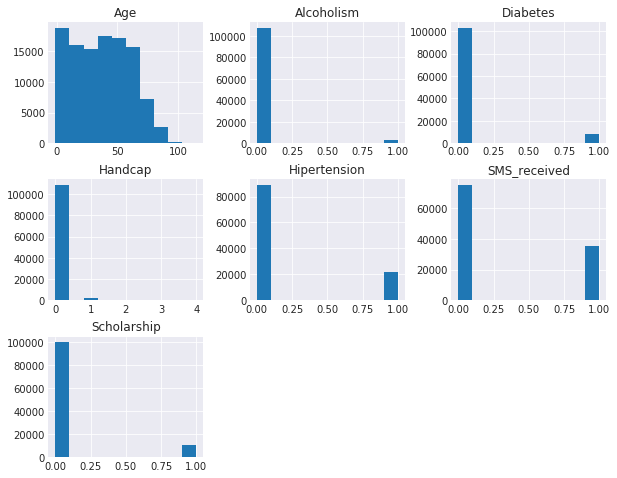

In [16]:
df.hist(figsize=(10,8))

# Research Question: What is relationship exist between illness stated 

In [20]:
#Get the average age of Hipertensive patient

Hipertensive = df.Hipertension==True
Not_Hipertensive = df.Hipertension==False

df.Age[Hipertensive].mean(), df.Age[Not_Hipertensive].mean()

(60.61359570661896, 31.30857922142326)

In [22]:
#Get the average age of Diabetic patient

Diabetic = df.Diabetes==True
Not_Diabetic = df.Diabetes==False

df.Age[Diabetic].mean(), df.Age[Not_Diabetic].mean()

(61.37252927105627, 35.20860952975123)

In [28]:
#Get the average age of Alcoholic patient
      
Alcoholic = df.Alcoholism==True
Not_Alcoholic = df.Alcoholism==False

df.Age[Alcoholic].mean(), df.Age[Not_Alcoholic].mean()

(49.59375, 36.696809652225035)

In [29]:
#Get the average age of Handicapped patient
Handcaped = df.Handcap==True
Not_Handcaped = df.Handcap==False

df.Age[Handcaped].mean(), df.Age[Not_Handcaped].mean()

(50.855044074436826, 36.810464880039895)

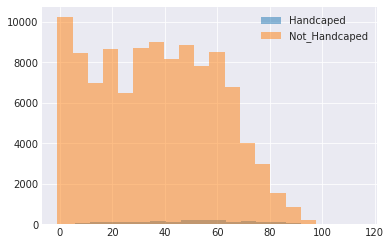

In [76]:
df.Age[Handcaped].hist(alpha=0.5, bins=20, label='Handcaped') 
df.Age[Not_Handcaped].hist(alpha=0.5, bins=20, label='Not_Handcaped')
plt.legend()



In [103]:
#What is the average age of scholarship beneficiary

df.groupby('Gender')['Scholarship'].value_counts()
df.query('Gender == "F"')['Age'].mean(), df.query('Gender == "M"')['Age'].mean()


(38.89398663697105, 33.73686251195492)

Text(0.5,1,'Relationship between Gender and Hipertension State')

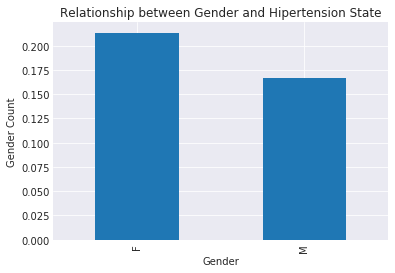

In [90]:
#'Relationship between Gender and Hipertension State'

df.groupby('Gender').Hipertension.mean()

df.groupby('Gender').Hipertension.mean().plot(kind= 'bar');
plt.ylabel('Gender Count')
plt.xlabel('Gender')
plt.title('Relationship between Gender and Hipertension State')


Text(0.5,1,'Relationship between Gender, Treatment Scholarship and Hipertension State')

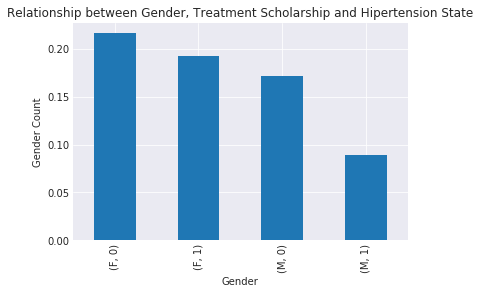

In [91]:
#Relationship between Gender, Treatment Scholarship and Hipertension State

df.groupby(['Gender', 'Scholarship']).Hipertension.mean().plot(kind='bar');
plt.ylabel('Gender Count')
plt.xlabel('Gender')
plt.title('Relationship between Gender, Treatment Scholarship and Hipertension State')

Text(0.5,1,'How Medical Visits and Scholarships Affect Hipertension State ')

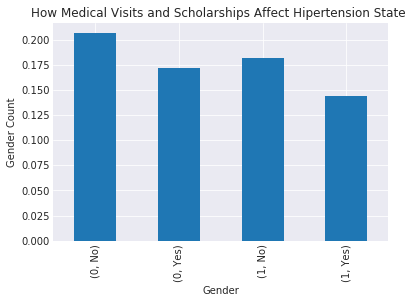

In [92]:
#How Medical Visits and Scholarships Affect Hipertension State 

df.groupby(['Scholarship', 'No-show']).Hipertension.mean().plot(kind='bar');
plt.ylabel('Gender Count')
plt.xlabel('Gender')
plt.title('How Medical Visits and Scholarships Affect Hipertension State ')

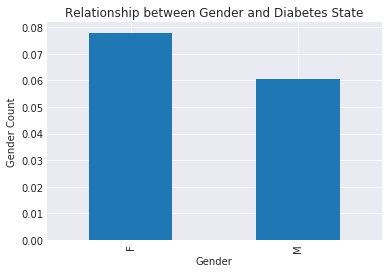

In [93]:
#Relationship between Gender and Diabetes State


df.groupby('Gender').Diabetes.mean()

df.groupby('Gender').Diabetes.mean().plot(kind= 'bar')
plt.ylabel('Gender Count')
plt.xlabel('Gender')
plt.title('Relationship between Gender and Diabetes State');

Text(0.5,1,'Relationship between Gender, Treatment Scholarship and Diabetes State')

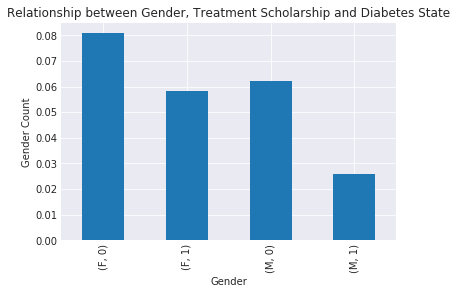

In [94]:
#Relationship between Gender, Treatment Scholarship and Diabetes State

df.groupby(['Gender', 'Scholarship']).Diabetes.mean().plot(kind='bar');
plt.ylabel('Gender Count')
plt.xlabel('Gender')
plt.title('Relationship between Gender, Treatment Scholarship and Diabetes State')

Text(0.5,1,'How Medical Visits and Scholarships Affect Diabetes State ')

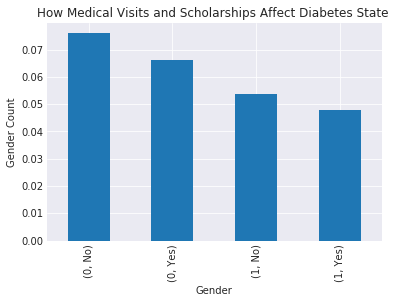

In [95]:
#How Medical Visits and Scholarships Affect Diabetes State 

df.groupby(['Scholarship', 'No-show']).Diabetes.mean().plot(kind='bar');
plt.ylabel('Gender Count')
plt.xlabel('Gender')
plt.title('How Medical Visits and Scholarships Affect Diabetes State ')

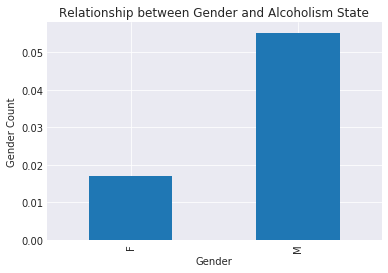

In [96]:
#Relationship between Gender and Alcoholism State
df.groupby('Gender').Alcoholism.mean()

df.groupby('Gender').Alcoholism.mean().plot(kind= 'bar');
plt.ylabel('Gender Count')
plt.xlabel('Gender')
plt.title('Relationship between Gender and Alcoholism State');

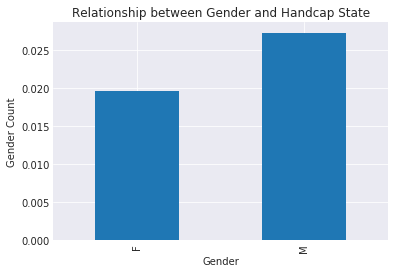

In [97]:
#'Relationship between Gender and Handcap State'
df.groupby('Gender').Handcap.mean()

df.groupby('Gender').Handcap.mean().plot(kind= 'bar')
plt.ylabel('Gender Count')
plt.xlabel('Gender')
plt.title('Relationship between Gender and Handcap State');

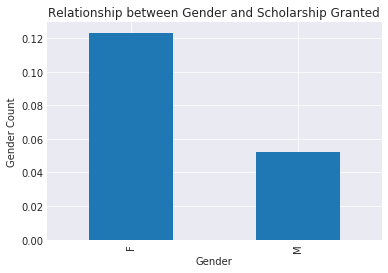

In [98]:
#Relationship between Gender and Scholarship Granted
df.groupby('Gender').Scholarship.mean()

df.groupby(['Gender']).Scholarship.mean().plot(kind= 'bar')
plt.ylabel('Gender Count')
plt.xlabel('Gender')
plt.title('Relationship between Gender and Scholarship Granted');

F    71840
M    38687
Name: Gender, dtype: int64

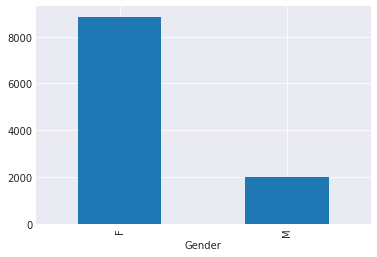

In [99]:
#Gender count by total Scholarship awareded

df.groupby('Gender').Scholarship.sum().plot(kind= 'bar');
df.Gender.value_counts()



In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0